# Lecture 19: Data Analysis and Visualization in Python - Part 2

## 1. Introduction to Seaborn, Its MatplotLib but better!

Seaborn is a powerful Python library built on top of Matplotlib.

We can use seaborn to creating attractive and informative statistical graphics. Seaborn is made for Pandas.

### Importing Seaborn
To get started, we need to import the `seaborn` library along with other essential libraries like `pandas` and `matplotlib`.


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00a 0:00:01


### Load and Preview the Dataset
We’re using the vgsales_short.csv dataset, which includes video game sales by region.

To get started with seaboarn we need at least pandas and seaborn.

In [2]:
# Import standard data and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # needed to customize plots 
import seaborn as sns


In [3]:
df = pd.read_csv('vgsales_full.csv')
#print(df.info())
df

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Zubo,2008,Misc,Electronic Arts,0.08,0.02,0.00,0.01,0.11,75,19,7.6,75,EA Bright Light,E10+
6890,Zumba Fitness,2010,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,42,10,5.5,16,"Pipeworks Software, Inc.",E
6891,Zumba Fitness: World Party,2013,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24,73,5,6.2,40,Zoe Mode,E
6892,Zumba Fitness Core,2012,Misc,505 Games,0.00,0.05,0.00,0.00,0.05,77,6,6.7,6,Zoe Mode,E10+


### Lets graph it.


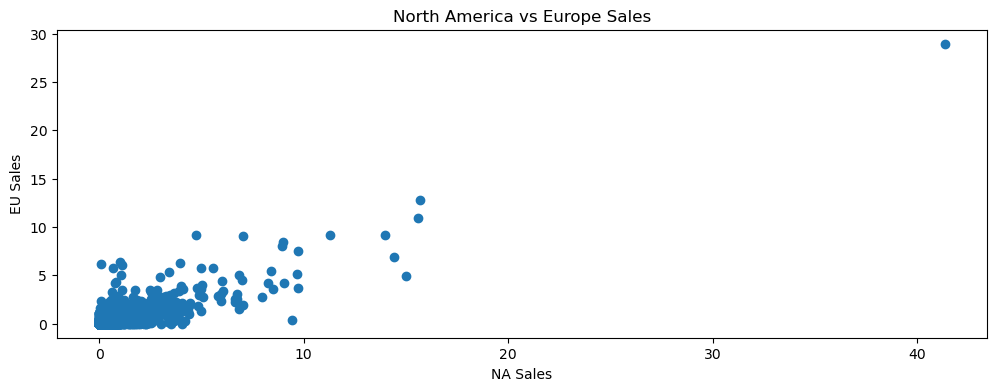

In [4]:
# Matplotlib: baseline plot
plt.figure(figsize=(12, 4))
plt.scatter(df['NA_Sales'], df['EU_Sales'])
plt.xlabel("NA Sales")
plt.ylabel("EU Sales")
plt.title("North America vs Europe Sales")
plt.show()


<AxesSubplot: xlabel='NA_Sales', ylabel='EU_Sales'>

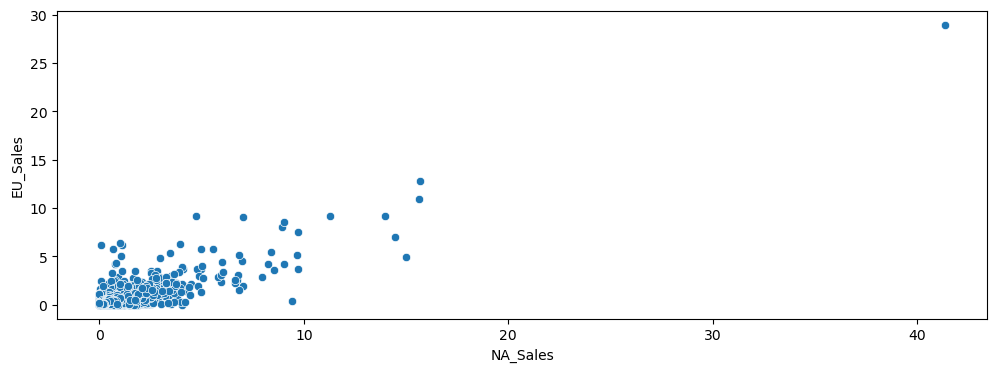

In [7]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)

## more examples

<AxesSubplot: xlabel='NA_Sales', ylabel='EU_Sales'>

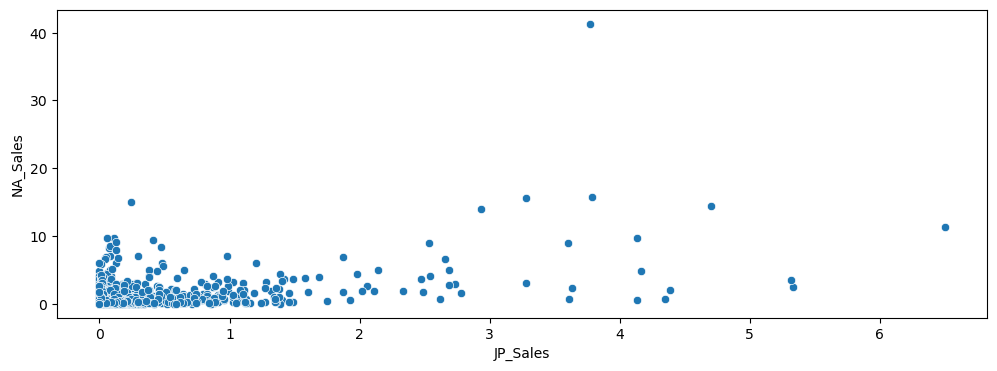

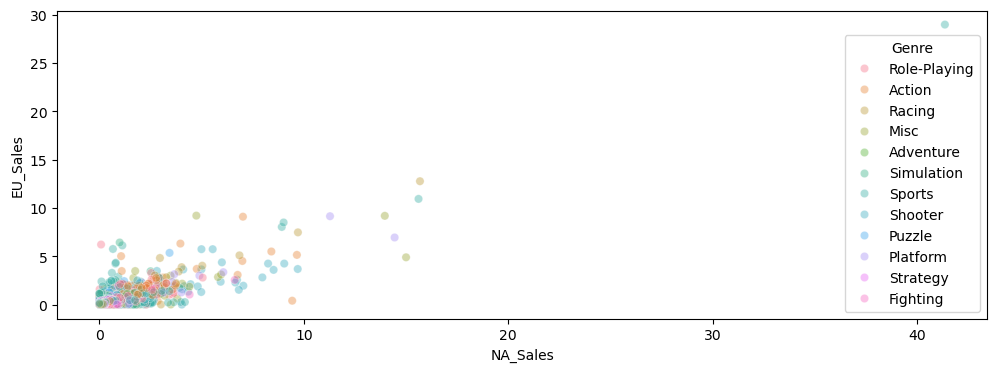

In [6]:


plt.figure(figsize=(12, 4))
sns.scatterplot(x='JP_Sales', y='NA_Sales', data=df)

plt.figure(figsize=(12, 4))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df, hue='Genre', alpha=0.4)

## Cleaning Up Data
Feature Engineering or cleaning up data is the act of exstracting information and adapting the infromation to allow for the ML to process. 
For example it is hard for a ML to comprehend 2050-09-02 23:00 but easy to understand a float that can be converted later. 

A timestamp like "2050-09-02 23:00" is not directly useful.

It can be decomposed into features like:

- Hour (23)

-  Day of the week (Saturday)

- AM/PM indicator (1 if PM, 0 if AM)

Integer Encoding: Directly Converting categories into integers Ie: 1,2,3...N
The encoding may not make sense. 

pro : easy to do
con: can cause confusion due to order


Hot Encoding (Dummy Variables): Converts categories into individual feature. 


## Key Encoding Techniques for Categorical Data

When dealing with non-numeric categories (e.g., game genres, ratings), we must encode them into numeric formats.
### Integer Encoding

Categories are mapped directly to integers.

Example:
- Action → 0

- Adventure → 1

- Shooter → 2


In [124]:
df = pd.read_csv('vgsales_full.csv')
vgSales_df  = df.drop(columns=["Name","Publisher","Developer","Rating"])
vgSales_df.corr()

ValueError: could not convert string to float: 'Role-Playing'

Notice the Genre is giving us an error

In [125]:
vgSales_df["Genre"].unique()

array(['Role-Playing', 'Action', 'Racing', 'Misc', 'Adventure',
       'Simulation', 'Sports', 'Shooter', 'Puzzle', 'Platform',
       'Strategy', 'Fighting'], dtype=object)

In [126]:
#as a reminder we are still working with pandas.
# Convert the 'Genre' column to a categorical type
# This is important for the next step
df["Genre"] = df["Genre"].astype('category')

# Assign integer codes to each category
vgSales_df["Genre"] = df["Genre"].cat.codes

vgSales_df["Genre"].unique()

array([ 7,  0,  6,  3,  1,  9, 10,  8,  5,  4, 11,  2], dtype=int8)

    Let me ask you. what is "7"

Like above with integer encoding you lose human-readable mapping. Because of this you need to explicitly record the mapping yourself.

In [127]:
df["Genre"] = df["Genre"].astype('category')

genre_mapping = dict(enumerate(df['Genre'].cat.categories))

print(genre_mapping)

{0: 'Action', 1: 'Adventure', 2: 'Fighting', 3: 'Misc', 4: 'Platform', 5: 'Puzzle', 6: 'Racing', 7: 'Role-Playing', 8: 'Shooter', 9: 'Simulation', 10: 'Sports', 11: 'Strategy'}


lets do a quick example of a reverse lookup

In [128]:
genre_mapping[vgSales_df['Genre'][0]]

'Role-Playing'

In [131]:
vgSales_df

,Genre,NA_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score
0,7,0.49,0.26,1.27,75,35,8.5
1,7,0.23,0.20,0.68,76,24,8.9
2,7,0.14,0.17,0.46,70,23,8.7
3,0,0.84,0.00,1.31,78,83,7.8
4,0,0.65,0.00,1.24,79,53,7.7
...,...,...,...,...,...,...,...
6889,3,0.08,0.00,0.11,75,19,7.6
6890,10,1.74,0.00,2.37,42,10,5.5
6891,3,0.17,0.00,0.24,73,5,6.2
6892,3,0.00,0.00,0.05,77,6,6.7


In [ ]:
vgSales_df.corr()['Genre'].sort_values()

Critic_Count   -0.018331
JP_Sales       -0.002295
Global_Sales    0.010134
NA_Sales        0.017717
User_Score      0.023266
Critic_Score    0.148304
Genre           1.000000
Name: Genre, dtype: float64

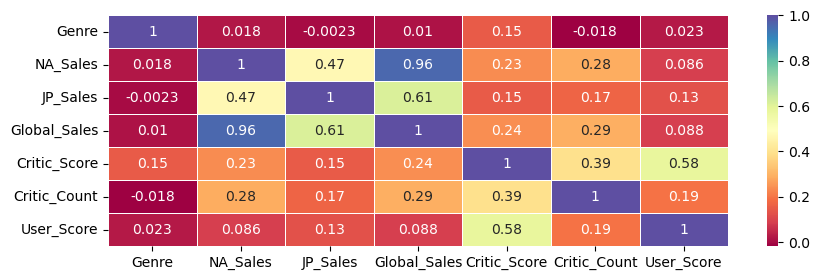

In [130]:
plt.figure(figsize = (10, 3))
vgSales_df = vgSales_df.drop(columns=["EU_Sales","Other_Sales","Year_of_Release","User_Count"])
sns.heatmap(vgSales_df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

## One-Hot Encoding (Dummy Variables)

Each category becomes its own binary column (0 or 1).

    Example:

| Genre | E | E10+ | T |
|------|------|------|------|
| E | 0 | 1 | 0 |
| E10+ | 0 | 0 | 1 |
| T | 1 | 0 | 0 |

In [105]:
df = pd.read_csv('vgsales_full.csv')
vgSales_df  = df.drop(columns=["Name","Publisher","Developer","Rating","Genre"])
df["Rating"]

0          T
1          T
2          T
3          M
4          M
        ... 
6889    E10+
6890       E
6891       E
6892    E10+
6893    E10+
Name: Rating, Length: 6894, dtype: object

In [106]:
# Create one-hot encoded columns for Rating
vg_rating = pd.get_dummies(df['Rating'])
vg_rating

,AO,E,E10+,K-A,M,RP,T
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
6889,False,False,True,False,False,False,False
6890,False,True,False,False,False,False,False
6891,False,True,False,False,False,False,False
6892,False,False,True,False,False,False,False


In [107]:
vg_rating = vg_rating.map(int)
vg_rating

,AO,E,E10+,K-A,M,RP,T
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
6889,0,0,1,0,0,0,0
6890,0,1,0,0,0,0,0
6891,0,1,0,0,0,0,0
6892,0,0,1,0,0,0,0


In [108]:
vgSales_df = pd.concat([vgSales_df, vg_rating], axis=1)
vgSales_df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,AO,E,E10+,K-A,M,RP,T
0,2002,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,0,0,0,0,0,0,1
1,2002,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,0,0,0,0,0,0,1
2,2002,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,0,0,0,0,0,0,1
3,2009,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,0,0,0,0,1,0,0
4,2009,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,2008,0.08,0.02,0.00,0.01,0.11,75,19,7.6,75,0,0,1,0,0,0,0
6890,2010,1.74,0.45,0.00,0.18,2.37,42,10,5.5,16,0,1,0,0,0,0,0
6891,2013,0.17,0.05,0.00,0.02,0.24,73,5,6.2,40,0,1,0,0,0,0,0
6892,2012,0.00,0.05,0.00,0.00,0.05,77,6,6.7,6,0,0,1,0,0,0,0


In [109]:
vgSales_df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,AO,E,E10+,K-A,M,RP,T
Year_of_Release,1.000000,-0.020471,0.038022,-0.041715,0.038807,0.002447,-0.011215,0.197043,-0.251482,0.196867,-0.007058,-0.178187,0.159020,-0.032648,0.149353,0.010002,-0.091048
NA_Sales,-0.020471,1.000000,0.841701,0.468377,0.726931,0.955784,0.232922,0.284362,0.085827,0.246075,0.010868,0.056460,-0.034177,-0.001637,0.061024,-0.004889,-0.074573
EU_Sales,0.038022,0.841701,1.000000,0.519490,0.716493,0.939244,0.212843,0.266012,0.055798,0.283392,0.006610,0.047340,-0.038579,-0.001312,0.068450,-0.003601,-0.071748
JP_Sales,-0.041715,0.468377,0.519490,1.000000,0.394698,0.613336,0.147178,0.167641,0.127920,0.072456,-0.002686,0.063640,-0.030517,0.058707,-0.036493,-0.002686,-0.007687
Other_Sales,0.038807,0.726931,0.716493,0.394698,1.000000,0.804165,0.191189,0.239877,0.057182,0.240021,0.000359,0.024778,-0.026337,-0.002332,0.072178,-0.003229,-0.061333
Global_Sales,0.002447,0.955784,0.939244,0.613336,0.804165,1.000000,0.237083,0.290676,0.088406,0.263991,0.007262,0.057099,-0.038435,0.007077,0.058567,-0.004569,-0.071364
Critic_Score,-0.011215,0.232922,0.212843,0.147178,0.191189,0.237083,1.000000,0.394893,0.579671,0.265531,0.019763,0.019964,-0.057882,0.018894,0.063049,-0.006308,-0.030794
Critic_Count,0.197043,0.284362,0.266012,0.167641,0.239877,0.290676,0.394893,1.000000,0.194691,0.365505,0.018298,-0.205595,-0.082131,-0.008687,0.276593,-0.010570,0.031140
User_Score,-0.251482,0.085827,0.055798,0.127920,0.057182,0.088406,0.579671,0.194691,1.000000,0.018505,0.011843,-0.010396,-0.077145,0.001804,-0.002759,-0.003216,0.068493
User_Count,0.196867,0.246075,0.283392,0.072456,0.240021,0.263991,0.265531,0.365505,0.018505,1.000000,-0.001161,-0.131222,-0.058831,-0.002603,0.285130,-0.003036,-0.072937


In [110]:
vgSales_df.corr()['JP_Sales'].sort_values()

Year_of_Release   -0.041715
M                 -0.036493
E10+              -0.030517
T                 -0.007687
AO                -0.002686
RP                -0.002686
K-A                0.058707
E                  0.063640
User_Count         0.072456
User_Score         0.127920
Critic_Score       0.147178
Critic_Count       0.167641
Other_Sales        0.394698
NA_Sales           0.468377
EU_Sales           0.519490
Global_Sales       0.613336
JP_Sales           1.000000
Name: JP_Sales, dtype: float64

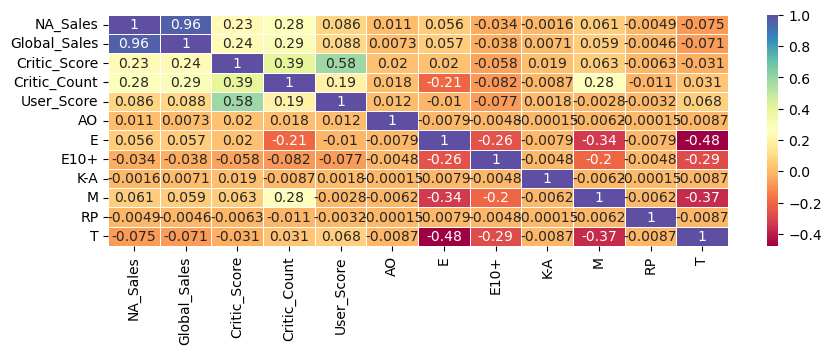

In [111]:
plt.figure(figsize = (10, 3))
vgSales_df = vgSales_df.drop(columns=["EU_Sales","JP_Sales","Other_Sales","Year_of_Release","User_Count"])
sns.heatmap(vgSales_df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()